In [1]:
import pandas as pd
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
df=pd.read_csv('bank_marketing_part1_Data-1.csv')

In [3]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
df.tail()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443
209,15.57,15.15,0.8527,5.920,3.231,2.640,5.879


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [6]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [7]:
df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [8]:
df.shape

(210, 7)

In [9]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    print("Skew of " + column)
    print(df[column].skew(),end=' ')

    print("----------------------------------------------------------------------------")
    

    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=True, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

In [10]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

7

Description of spending
----------------------------------------------------------------------------
count    210.000000
mean      14.847524
std        2.909699
min       10.590000
25%       12.270000
50%       14.355000
75%       17.305000
max       21.180000
Name: spending, dtype: float64 Skew of spending
0.3998891917177586 ----------------------------------------------------------------------------
Distribution of spending
----------------------------------------------------------------------------


C:\Users\Kinshuk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


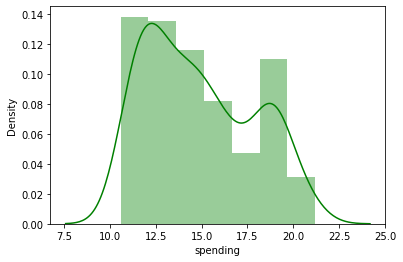

BoxPlot of spending
----------------------------------------------------------------------------


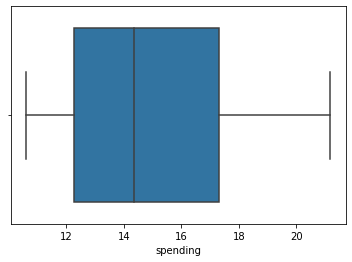

Description of advance_payments
----------------------------------------------------------------------------
count    210.000000
mean      14.559286
std        1.305959
min       12.410000
25%       13.450000
50%       14.320000
75%       15.715000
max       17.250000
Name: advance_payments, dtype: float64 Skew of advance_payments
0.3865727731912213 ----------------------------------------------------------------------------
Distribution of advance_payments
----------------------------------------------------------------------------


C:\Users\Kinshuk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


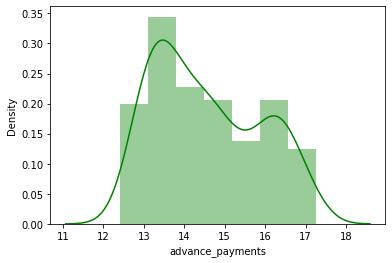

BoxPlot of advance_payments
----------------------------------------------------------------------------


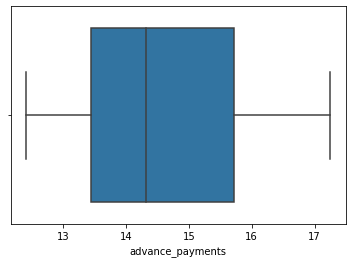

Description of probability_of_full_payment
----------------------------------------------------------------------------
count    210.000000
mean       0.870999
std        0.023629
min        0.808100
25%        0.856900
50%        0.873450
75%        0.887775
max        0.918300
Name: probability_of_full_payment, dtype: float64 Skew of probability_of_full_payment
-0.5379537283982821 ----------------------------------------------------------------------------
Distribution of probability_of_full_payment
----------------------------------------------------------------------------


C:\Users\Kinshuk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


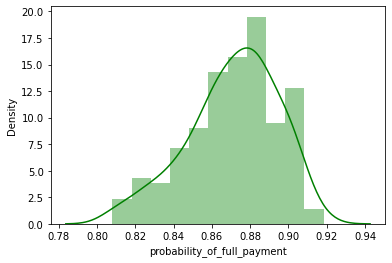

BoxPlot of probability_of_full_payment
----------------------------------------------------------------------------


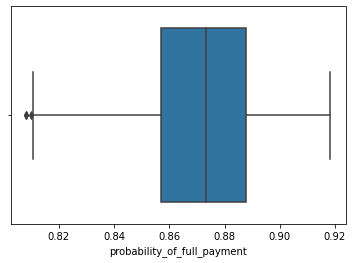

Description of current_balance
----------------------------------------------------------------------------
count    210.000000
mean       5.628533
std        0.443063
min        4.899000
25%        5.262250
50%        5.523500
75%        5.979750
max        6.675000
Name: current_balance, dtype: float64 Skew of current_balance
0.52548156013189 ----------------------------------------------------------------------------
Distribution of current_balance
----------------------------------------------------------------------------


C:\Users\Kinshuk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


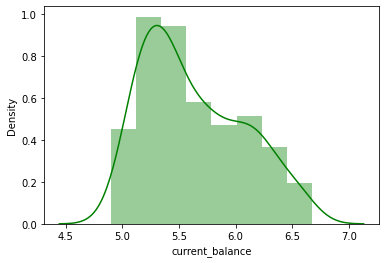

BoxPlot of current_balance
----------------------------------------------------------------------------


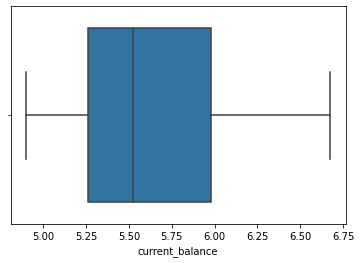

Description of credit_limit
----------------------------------------------------------------------------
count    210.000000
mean       3.258605
std        0.377714
min        2.630000
25%        2.944000
50%        3.237000
75%        3.561750
max        4.033000
Name: credit_limit, dtype: float64 Skew of credit_limit
0.13437824513162136 ----------------------------------------------------------------------------
Distribution of credit_limit
----------------------------------------------------------------------------


C:\Users\Kinshuk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


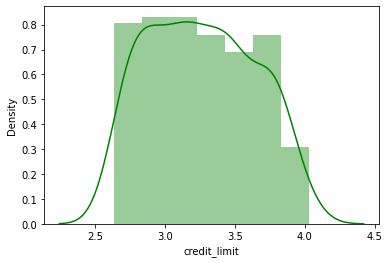

BoxPlot of credit_limit
----------------------------------------------------------------------------


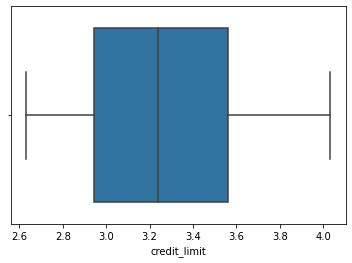

Description of min_payment_amt
----------------------------------------------------------------------------
count    210.000000
mean       3.700201
std        1.503557
min        0.765100
25%        2.561500
50%        3.599000
75%        4.768750
max        8.456000
Name: min_payment_amt, dtype: float64 Skew of min_payment_amt
0.40166734329025183 ----------------------------------------------------------------------------
Distribution of min_payment_amt
----------------------------------------------------------------------------


C:\Users\Kinshuk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


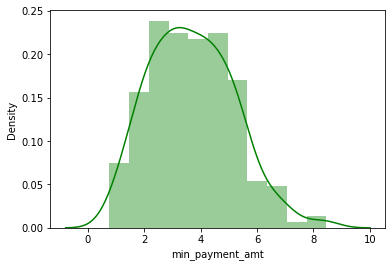

BoxPlot of min_payment_amt
----------------------------------------------------------------------------


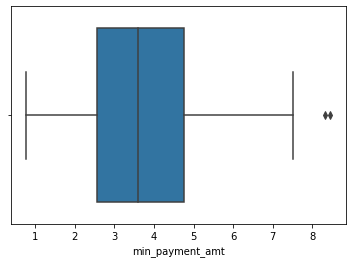

Description of max_spent_in_single_shopping
----------------------------------------------------------------------------
count    210.000000
mean       5.408071
std        0.491480
min        4.519000
25%        5.045000
50%        5.223000
75%        5.877000
max        6.550000
Name: max_spent_in_single_shopping, dtype: float64 Skew of max_spent_in_single_shopping
0.5618973749548658 ----------------------------------------------------------------------------
Distribution of max_spent_in_single_shopping
----------------------------------------------------------------------------


C:\Users\Kinshuk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


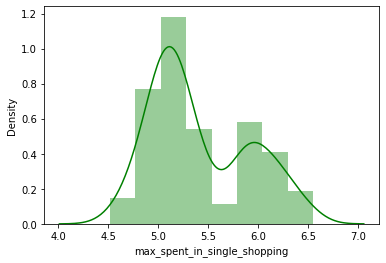

BoxPlot of max_spent_in_single_shopping
----------------------------------------------------------------------------


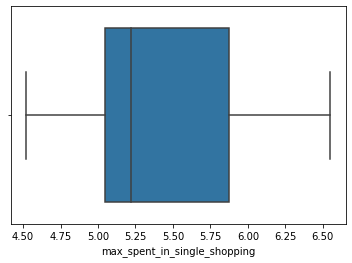

In [11]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

In [12]:
# Complete the function to calculate lower_range and upper_range
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [13]:
for feature in df[['spending', 'advance_payments', 'probability_of_full_payment', 'current_balance', 'credit_limit','min_payment_amt']]: 
    lr,ur=treat_outlier(df[feature])
    df[feature]=np.where(df[feature]>ur,ur,df[feature])
    df[feature]=np.where(df[feature]<lr,lr,df[feature])

<AxesSubplot:>

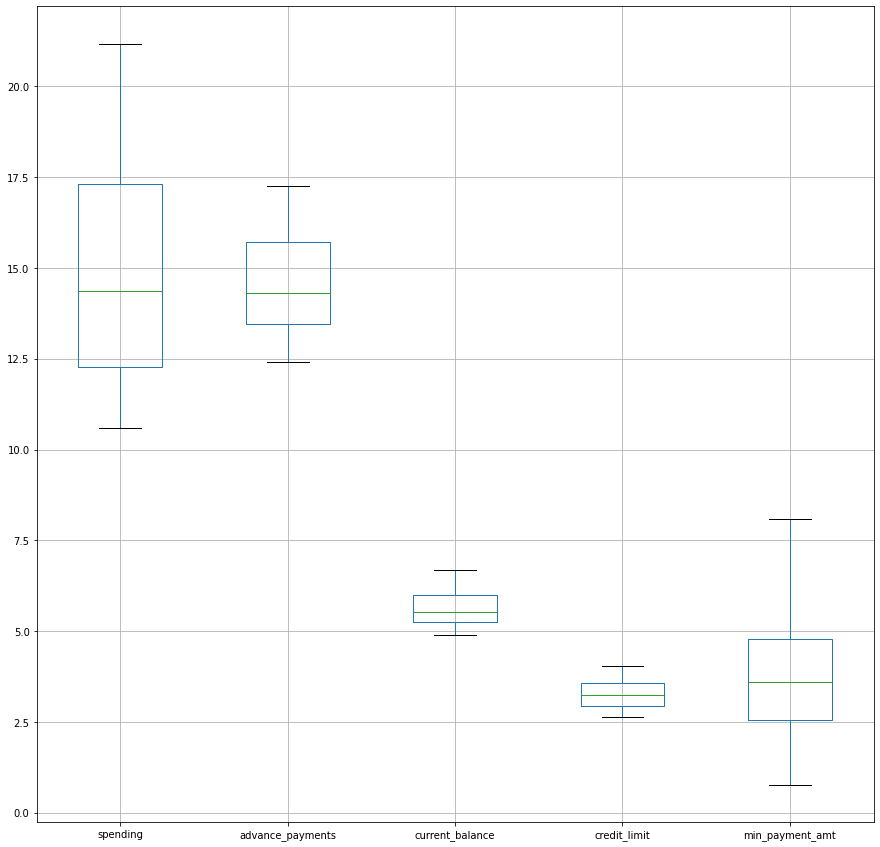

In [14]:
plt.figure(figsize=(15,15))
df[['spending', 'advance_payments', 'current_balance', 'credit_limit','min_payment_amt']].boxplot()

<AxesSubplot:>

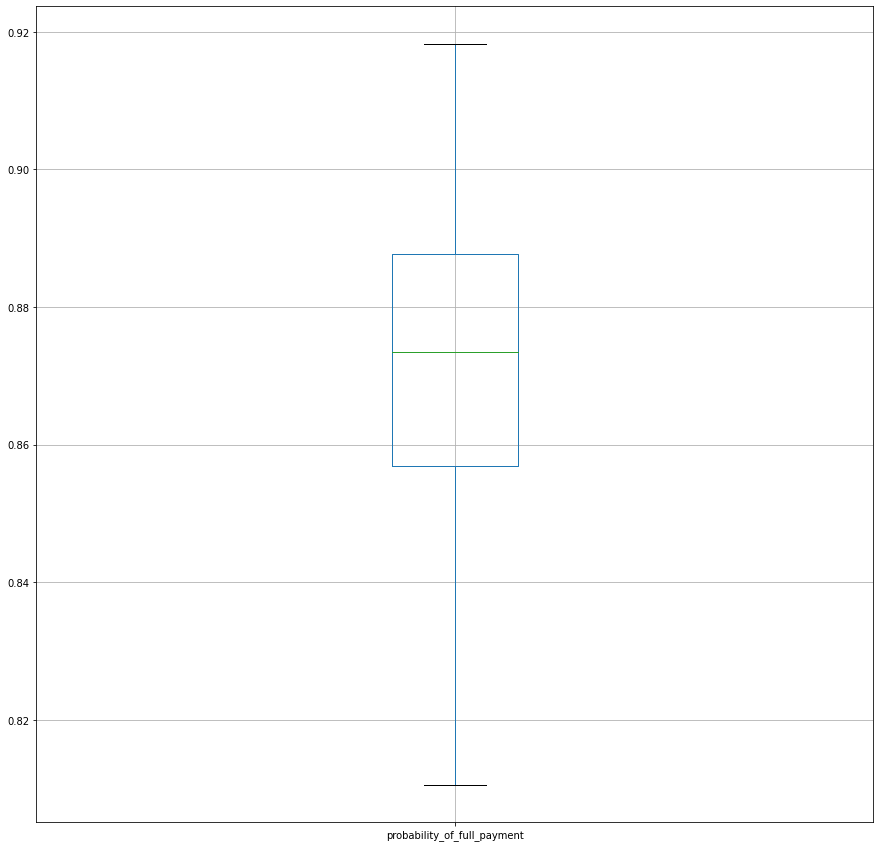

In [15]:
plt.figure(figsize=(15,15))
df[['probability_of_full_payment']].boxplot()


In [16]:
corr = df_num.corr(method='pearson')

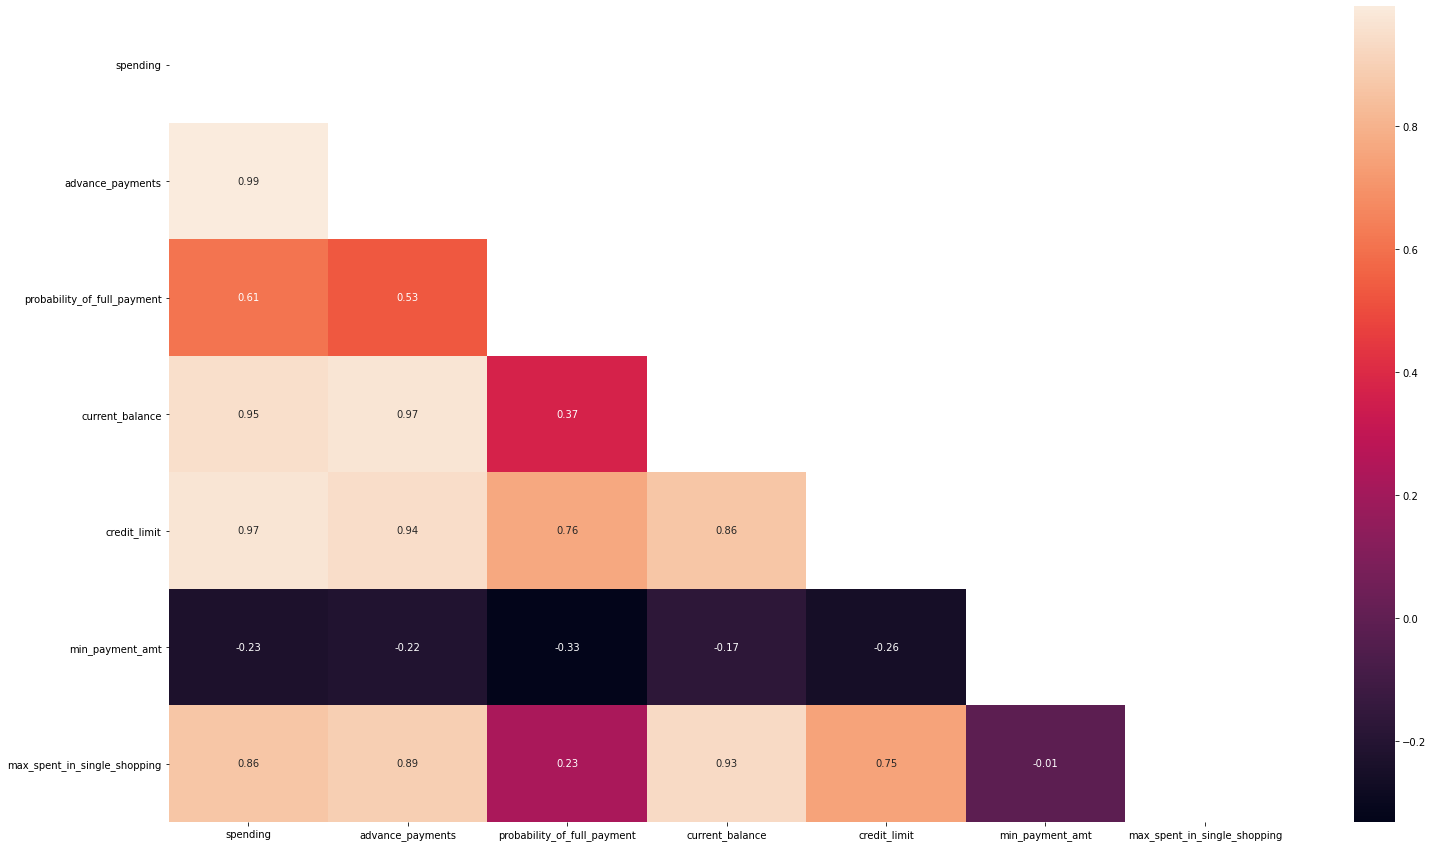

In [17]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(df_num.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

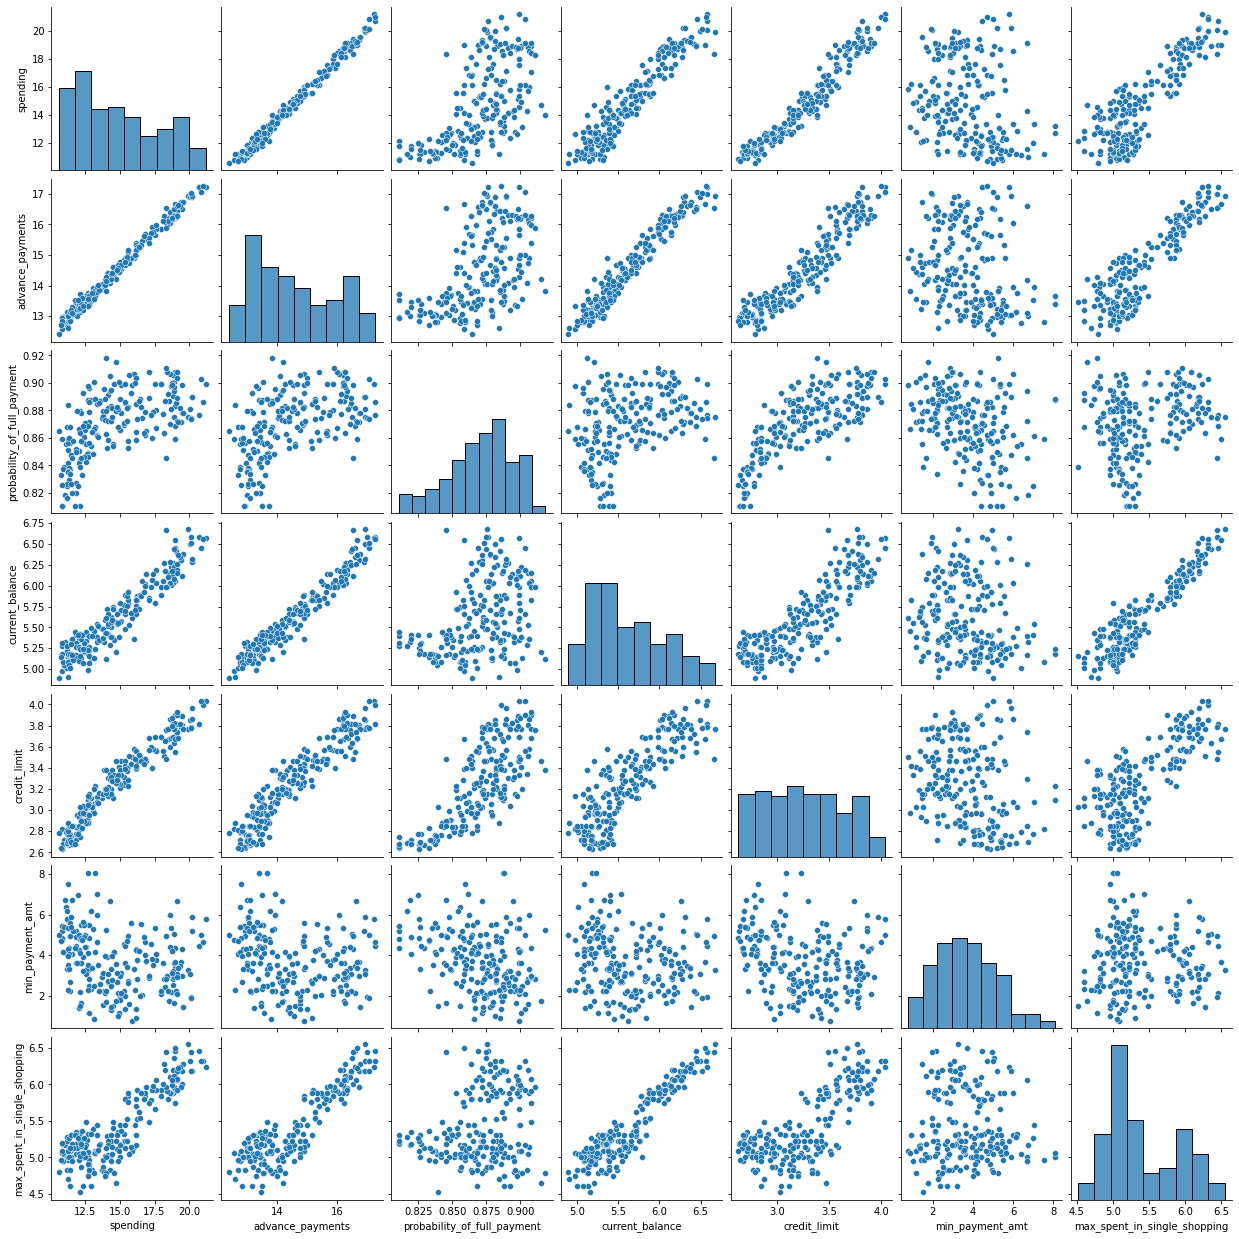

In [18]:
sns.pairplot(df)

In [19]:
from sklearn.preprocessing import MinMaxScaler


In [20]:
# Creating an object for the StandardScaler function
min_max= MinMaxScaler()

In [21]:
scaled_df = pd.DataFrame(min_max.fit_transform(df),columns=df.columns)

In [22]:
scaled_df

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,0.882908,0.931818,0.599861,1.000000,0.807555,0.339995,1.000000
1,0.509915,0.512397,0.889521,0.261261,0.678546,0.351479,0.307730
2,0.789424,0.828512,0.671347,0.759572,0.801853,0.355854,0.802068
3,0.022663,0.113636,0.000000,0.213401,0.007840,0.603853,0.327917
4,0.698772,0.712810,0.822676,0.557995,0.758375,0.178125,0.648941
...,...,...,...,...,...,...,...
205,0.311615,0.332645,0.718696,0.304054,0.405560,0.440343,0.107829
206,0.583569,0.663223,0.494023,0.578829,0.575909,0.568034,0.628262
207,0.324835,0.361570,0.640710,0.303491,0.406985,0.130138,0.237322
208,0.522191,0.535124,0.830103,0.456081,0.609408,0.205741,0.454948


In [23]:
scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,0.402032,0.274759,0.0,0.158640,0.355524,0.634089,1.0
advance_payments,210.0,0.444067,0.269826,0.0,0.214876,0.394628,0.682851,1.0
probability_of_full_payment,210.0,0.561101,0.218730,0.0,0.429964,0.583614,0.716607,1.0
current_balance,210.0,0.410773,0.249473,0.0,0.204533,0.351633,0.608530,1.0
credit_limit,210.0,0.448043,0.269219,0.0,0.223806,0.432644,0.664113,1.0
min_payment_amt,210.0,0.400872,0.204345,0.0,0.245594,0.387435,0.547356,1.0
max_spent_in_single_shopping,210.0,0.437751,0.241989,0.0,0.258986,0.346627,0.668636,1.0


In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [25]:
wardlink = linkage(scaled_df, method = 'ward')## linkagge using wards methos

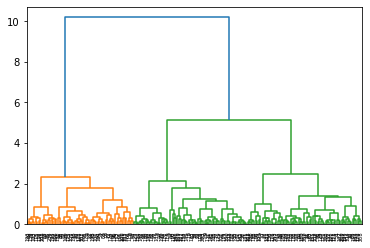

In [26]:
dend = dendrogram(wardlink)

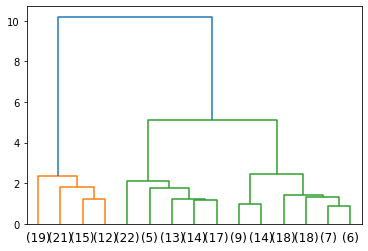

In [27]:
#Lastp= ahows only the last p merges are shown
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 15,
                 )

In [28]:
from scipy.cluster.hierarchy import fcluster

In [29]:
#Method 1=  we tell it to create 3 clusters, using maxclust . We use max clust to cut the cluters

clusters = fcluster(wardlink, 3, criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 3, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 2, 1, 3, 2, 3, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 2, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 2, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 2, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 3, 3], dtype=int32)

In [30]:
indices_one=clusters==1
indices_two=clusters==2
indices_three=clusters==3
clusters[indices_one]=0
clusters[indices_two]=1
clusters[indices_three]=2

In [31]:
clusters

array([0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1,
       0, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0,
       1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 0,
       0, 2, 0, 2, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 2, 0,
       0, 1, 1, 0, 2, 1, 2, 0, 0, 0, 1, 0, 1, 0, 2, 0, 2, 0, 0, 1, 1, 0,
       2, 2, 0, 1, 1, 0, 2, 1, 1, 0, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2,
       2, 0, 1, 0, 0, 1, 0, 2, 1, 2, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 0, 2, 2, 1, 2, 1, 2, 0, 0, 0,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 1, 2, 2, 1, 0, 2, 0, 0, 1,
       0, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2], dtype=int32)

In [32]:
# Create K Means cluster and store the result in the object k_means
k_means = KMeans(n_clusters = 3,random_state=1)

In [33]:
k_means.fit(scaled_df)

KMeans(n_clusters=3, random_state=1)

In [34]:
k_means.labels_

array([1, 0, 1, 2, 1, 2, 2, 0, 1, 2, 1, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2,
       1, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1,
       2, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 0, 2, 2, 0, 0, 1,
       1, 0, 1, 2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 0, 0, 0, 0, 1, 2, 0, 1, 0,
       0, 2, 0, 1, 0, 2, 2, 1, 1, 1, 2, 1, 0, 1, 0, 1, 0, 1, 1, 2, 2, 1,
       0, 0, 1, 2, 2, 1, 0, 0, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 0, 2, 0,
       2, 1, 2, 1, 1, 2, 1, 0, 0, 0, 2, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 1, 1, 1, 2, 0, 0, 0, 2, 0, 2, 0, 1, 1, 1,
       0, 2, 0, 2, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 0, 2, 1, 0, 1, 1, 2,
       1, 2, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0])

In [35]:
k_means.inertia_

22.770013026036565

In [36]:
k_means = KMeans(n_clusters = 1,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

90.11520380592975

In [37]:
k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

35.86521074048986

In [38]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

22.770013026036565

In [39]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

19.323702051792594

In [40]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

16.88519118531759

In [41]:
wss =[] 


In [42]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [43]:
wss

[90.11520380592975,
 35.86521074048986,
 22.770013026036565,
 19.323702051792594,
 16.88519118531759,
 15.1045576826233,
 13.802943437508269,
 12.40244683471637,
 11.480004867341448,
 10.995733610492227]

In [44]:
a=[1,2,3,4,5,6,7,8,9,10]

C:\Users\Kinshuk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

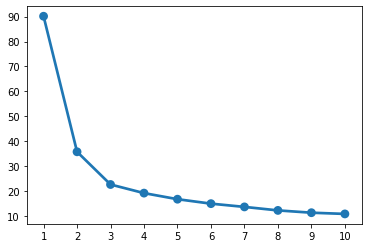

In [45]:
sns.pointplot(a, wss)

C:\Users\Kinshuk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


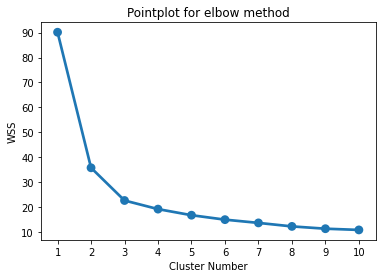

In [46]:
sns.pointplot(list(range(1,11)),wss)
plt.title('Pointplot for elbow method')
plt.xlabel('Cluster Number')
plt.ylabel('WSS')
plt.show()

In [47]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

In [48]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [49]:
# Calculating silhouette_score
silhouette_score(scaled_df,labels,random_state=1)

0.41888372435617

In [50]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_df)
labels4 = k_means.labels_

In [51]:
silhouette_score(scaled_df,labels4,random_state=1)

0.336795122525894

In [52]:
k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(scaled_df)
labels2 = k_means.labels_

In [53]:
silhouette_score(scaled_df,labels2,random_state=1)

0.5000644323521964

In [54]:
df["Clus_kmeans3"] = labels
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans3
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,0
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


In [55]:
clust_profile=df

clust_profile=clust_profile.groupby('Clus_kmeans3').mean()
clust_profile['freq']=df.Clus_kmeans3.value_counts().sort_index()
clust_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,freq
Clus_kmeans3,,,,,,,,
0,14.651159,14.442029,0.882067,5.546681,3.287304,2.796858,5.165638,69
1,18.610156,16.251719,0.884600,6.195547,3.709609,3.592094,6.056656,64
2,11.896104,13.257662,0.849848,5.230597,2.858026,4.591601,5.086234,77


No handles with labels found to put in legend.


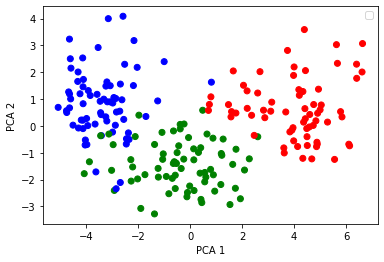

In [56]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
bank_pca_components = pca.fit_transform(df)
plt.figure(figsize=(6, 4))  
# Save components to a DataFrame
df_PCA_components = pd.DataFrame(bank_pca_components)
colormap = np.array(['red', 'blue', 'green']) #['red' --> 0, 'lime' --> 1, 'black' --> 2,'blue' --> 3]
plt.scatter(df_PCA_components[0], df_PCA_components[1], c=colormap[clusters])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()

# PROBLEM 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv('insurance_part2_data-2.csv')

In [3]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [5]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


In [6]:
df.drop_duplicates(inplace=True) 

In [7]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df.shape)

Number of duplicate rows = 0
(2861, 10)


In [8]:
df.describe(include="all")

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,2861.000000,2861,2861,2861,2861.000000,2861,2861.000000,2861.000000,2861,2861
unique,NaN,4,2,2,NaN,2,NaN,NaN,5,3
top,NaN,EPX,Travel Agency,No,NaN,Online,NaN,NaN,Customised Plan,ASIA
freq,NaN,1238,1709,1947,NaN,2815,NaN,NaN,1071,2327
mean,38.204124,NaN,NaN,NaN,15.080996,NaN,72.120238,61.757878,NaN,NaN
std,10.678106,NaN,NaN,NaN,25.826834,NaN,135.977200,71.399740,NaN,NaN
min,8.000000,NaN,NaN,NaN,0.000000,NaN,-1.000000,0.000000,NaN,NaN
25%,31.000000,NaN,NaN,NaN,0.000000,NaN,12.000000,20.000000,NaN,NaN
50%,36.000000,NaN,NaN,NaN,5.630000,NaN,28.000000,33.500000,NaN,NaN
75%,43.000000,NaN,NaN,NaN,17.820000,NaN,66.000000,69.300000,NaN,NaN


In [9]:
df.Agency_Code.value_counts()

EPX    1238
C2B     913
CWT     471
JZI     239
Name: Agency_Code, dtype: int64

In [10]:
df.Type.value_counts(normalize=True)

Travel Agency    0.597344
Airlines         0.402656
Name: Type, dtype: float64

In [11]:
df.Claimed.value_counts(normalize=True)

No     0.680531
Yes    0.319469
Name: Claimed, dtype: float64

In [12]:
df.Channel.value_counts(normalize=True)

Online     0.983922
Offline    0.016078
Name: Channel, dtype: float64

In [13]:
df['Product Name'].value_counts()

Customised Plan      1071
Bronze Plan           645
Cancellation Plan     615
Silver Plan           421
Gold Plan             109
Name: Product Name, dtype: int64

In [14]:
df['Destination'].value_counts()

ASIA        2327
Americas     319
EUROPE       215
Name: Destination, dtype: int64

In [15]:
df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [16]:
df.shape

(2861, 10)

In [17]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    print("Skew of " + column)
    print(df[column].skew(),end=' ')

    print("----------------------------------------------------------------------------")
    

    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=True, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

In [18]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

4

Description of Age
----------------------------------------------------------------------------
count    2861.000000
mean       38.204124
std        10.678106
min         8.000000
25%        31.000000
50%        36.000000
75%        43.000000
max        84.000000
Name: Age, dtype: float64 Skew of Age
1.1031446044352335 ----------------------------------------------------------------------------
Distribution of Age
----------------------------------------------------------------------------


C:\Users\Kinshuk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


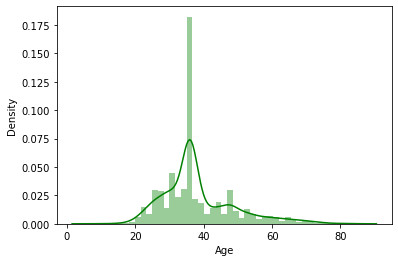

BoxPlot of Age
----------------------------------------------------------------------------


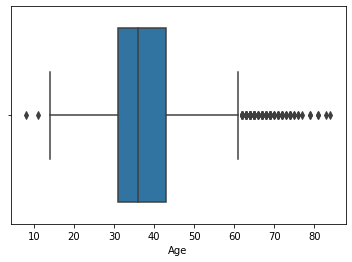

Description of Commision
----------------------------------------------------------------------------
count    2861.000000
mean       15.080996
std        25.826834
min         0.000000
25%         0.000000
50%         5.630000
75%        17.820000
max       210.210000
Name: Commision, dtype: float64 Skew of Commision
3.1047406576922842 ----------------------------------------------------------------------------
Distribution of Commision
----------------------------------------------------------------------------


C:\Users\Kinshuk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


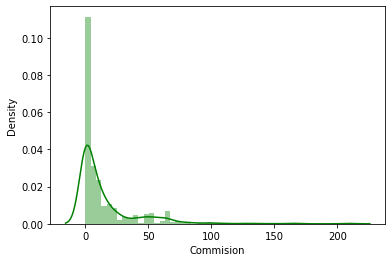

BoxPlot of Commision
----------------------------------------------------------------------------


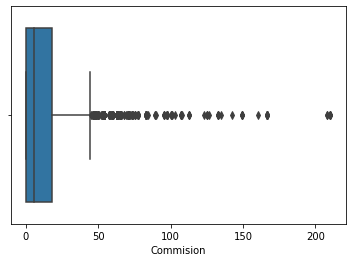

Description of Duration
----------------------------------------------------------------------------
count    2861.000000
mean       72.120238
std       135.977200
min        -1.000000
25%        12.000000
50%        28.000000
75%        66.000000
max      4580.000000
Name: Duration, dtype: float64 Skew of Duration
13.786096073249146 ----------------------------------------------------------------------------
Distribution of Duration
----------------------------------------------------------------------------


C:\Users\Kinshuk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


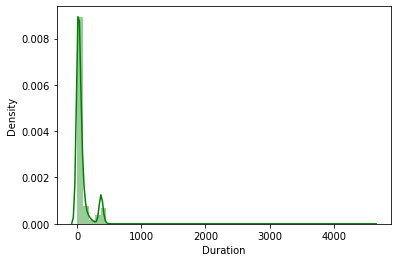

BoxPlot of Duration
----------------------------------------------------------------------------


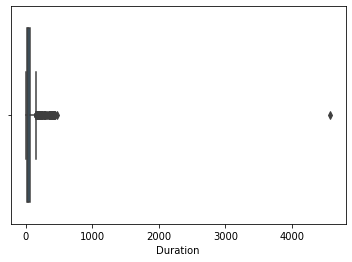

Description of Sales
----------------------------------------------------------------------------
count    2861.000000
mean       61.757878
std        71.399740
min         0.000000
25%        20.000000
50%        33.500000
75%        69.300000
max       539.000000
Name: Sales, dtype: float64 Skew of Sales
2.3446426921667585 ----------------------------------------------------------------------------
Distribution of Sales
----------------------------------------------------------------------------


C:\Users\Kinshuk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


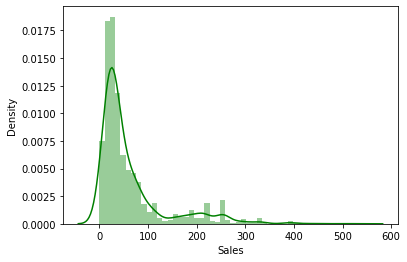

BoxPlot of Sales
----------------------------------------------------------------------------


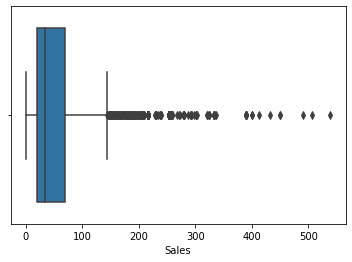

In [19]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

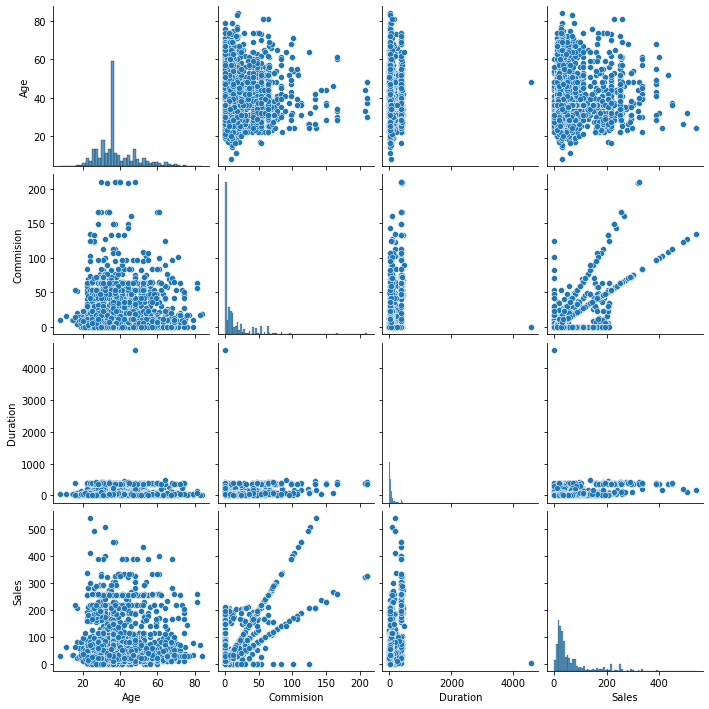

In [20]:
sns.pairplot(df[['Age','Commision','Duration','Sales']])

In [21]:
def univariateAnalysis_cat(column,nbins):
    
    
    plt.figure()
    print("Count Plot of " + column)
    print("----------------------------------------------------------------------------")
    sns.countplot(x=df[column], data=df);
    plt.show()
    
   



In [22]:
df_cat = df.select_dtypes(include = ['object'])
lstcatcolumns = list(df_cat.columns.values)
len(lstcatcolumns)

6

Count Plot of Agency_Code
----------------------------------------------------------------------------


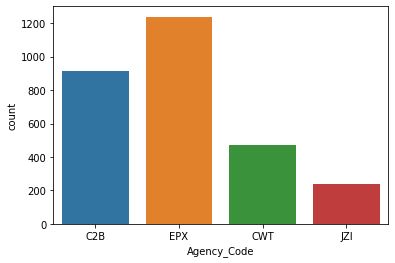

Count Plot of Type
----------------------------------------------------------------------------


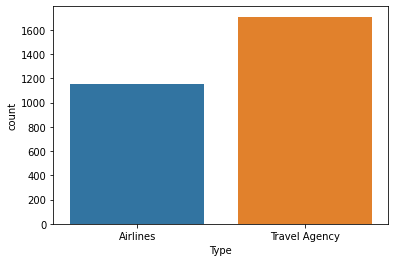

Count Plot of Claimed
----------------------------------------------------------------------------


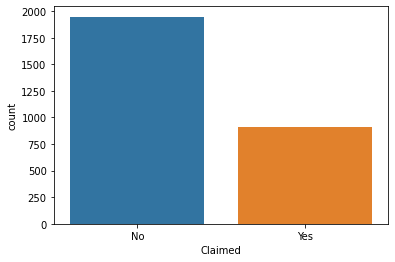

Count Plot of Channel
----------------------------------------------------------------------------


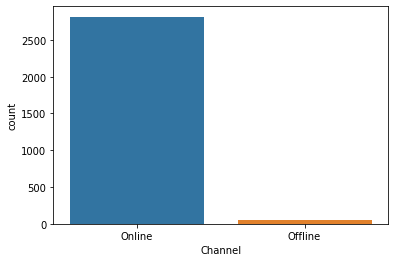

Count Plot of Product Name
----------------------------------------------------------------------------


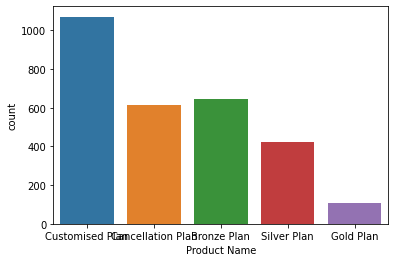

Count Plot of Destination
----------------------------------------------------------------------------


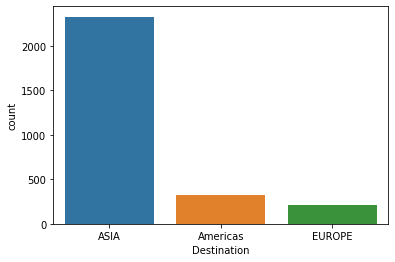

In [23]:
for x in lstcatcolumns:
    univariateAnalysis_cat(x,20)

In [24]:
def bivariateAnalysis_cat(column,nbins):
    
    
    plt.figure()
    print("Count Plot of " + column)
    print("----------------------------------------------------------------------------")
    sns.countplot(x=df[column], data=df,hue="Claimed");
    plt.show()
    
   



In [25]:
df_bi_cat = df.select_dtypes(include = ['object'])
df_bi=df_bi_cat.drop(['Claimed'],axis=1)
lstcatcolumns = list(df_bi.columns.values)
len(lstcatcolumns)


5

Count Plot of Agency_Code
----------------------------------------------------------------------------


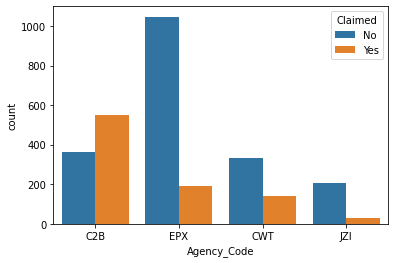

Count Plot of Type
----------------------------------------------------------------------------


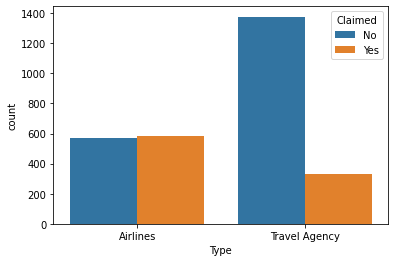

Count Plot of Channel
----------------------------------------------------------------------------


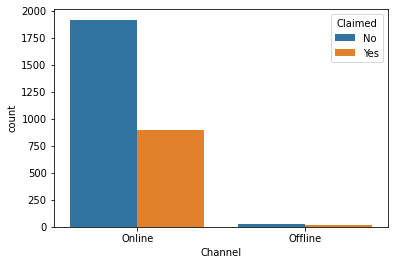

Count Plot of Product Name
----------------------------------------------------------------------------


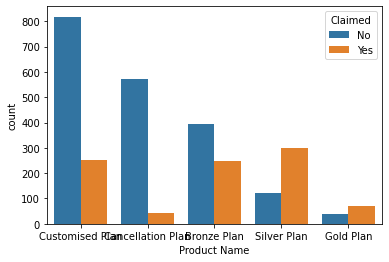

Count Plot of Destination
----------------------------------------------------------------------------


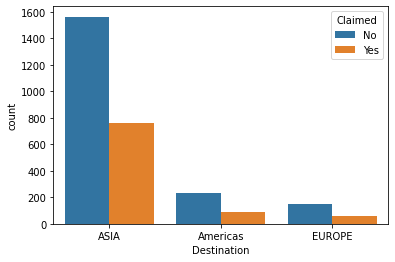

In [26]:
for x in lstcatcolumns:
    bivariateAnalysis_cat(x,20)

In [27]:
for i in df.columns:
    if(df[i].dtype=='object'):
        df[i]=pd.Categorical(df[i]).codes
        
    

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int8   
 6   Duration      2861 non-null   int64  
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   int8   
 9   Destination   2861 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 208.5 KB


In [29]:
skew=[]
col_name=[]
for i in df.columns:
    z=df[i].skew()
    skew.append(z)
    col_name.append(i)
    

In [30]:
pd.DataFrame({" Name":col_name,"Skew":skew})

,Name,Skew
0,Age,1.103145
1,Agency_Code,-0.087398
2,Type,-0.397178
3,Claimed,0.774769
4,Commision,3.104741
5,Channel,-7.698970
6,Duration,13.786096
7,Sales,2.344643
8,Product Name,0.415822
9,Destination,2.111240


In [31]:
df

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0
...,...,...,...,...,...,...,...,...,...,...
2995,28,1,1,1,166.53,1,364,256.20,3,1
2996,35,0,0,0,13.50,1,5,54.00,3,0
2997,36,2,1,0,0.00,1,54,28.00,2,0
2998,34,0,0,1,7.64,1,39,30.55,0,0


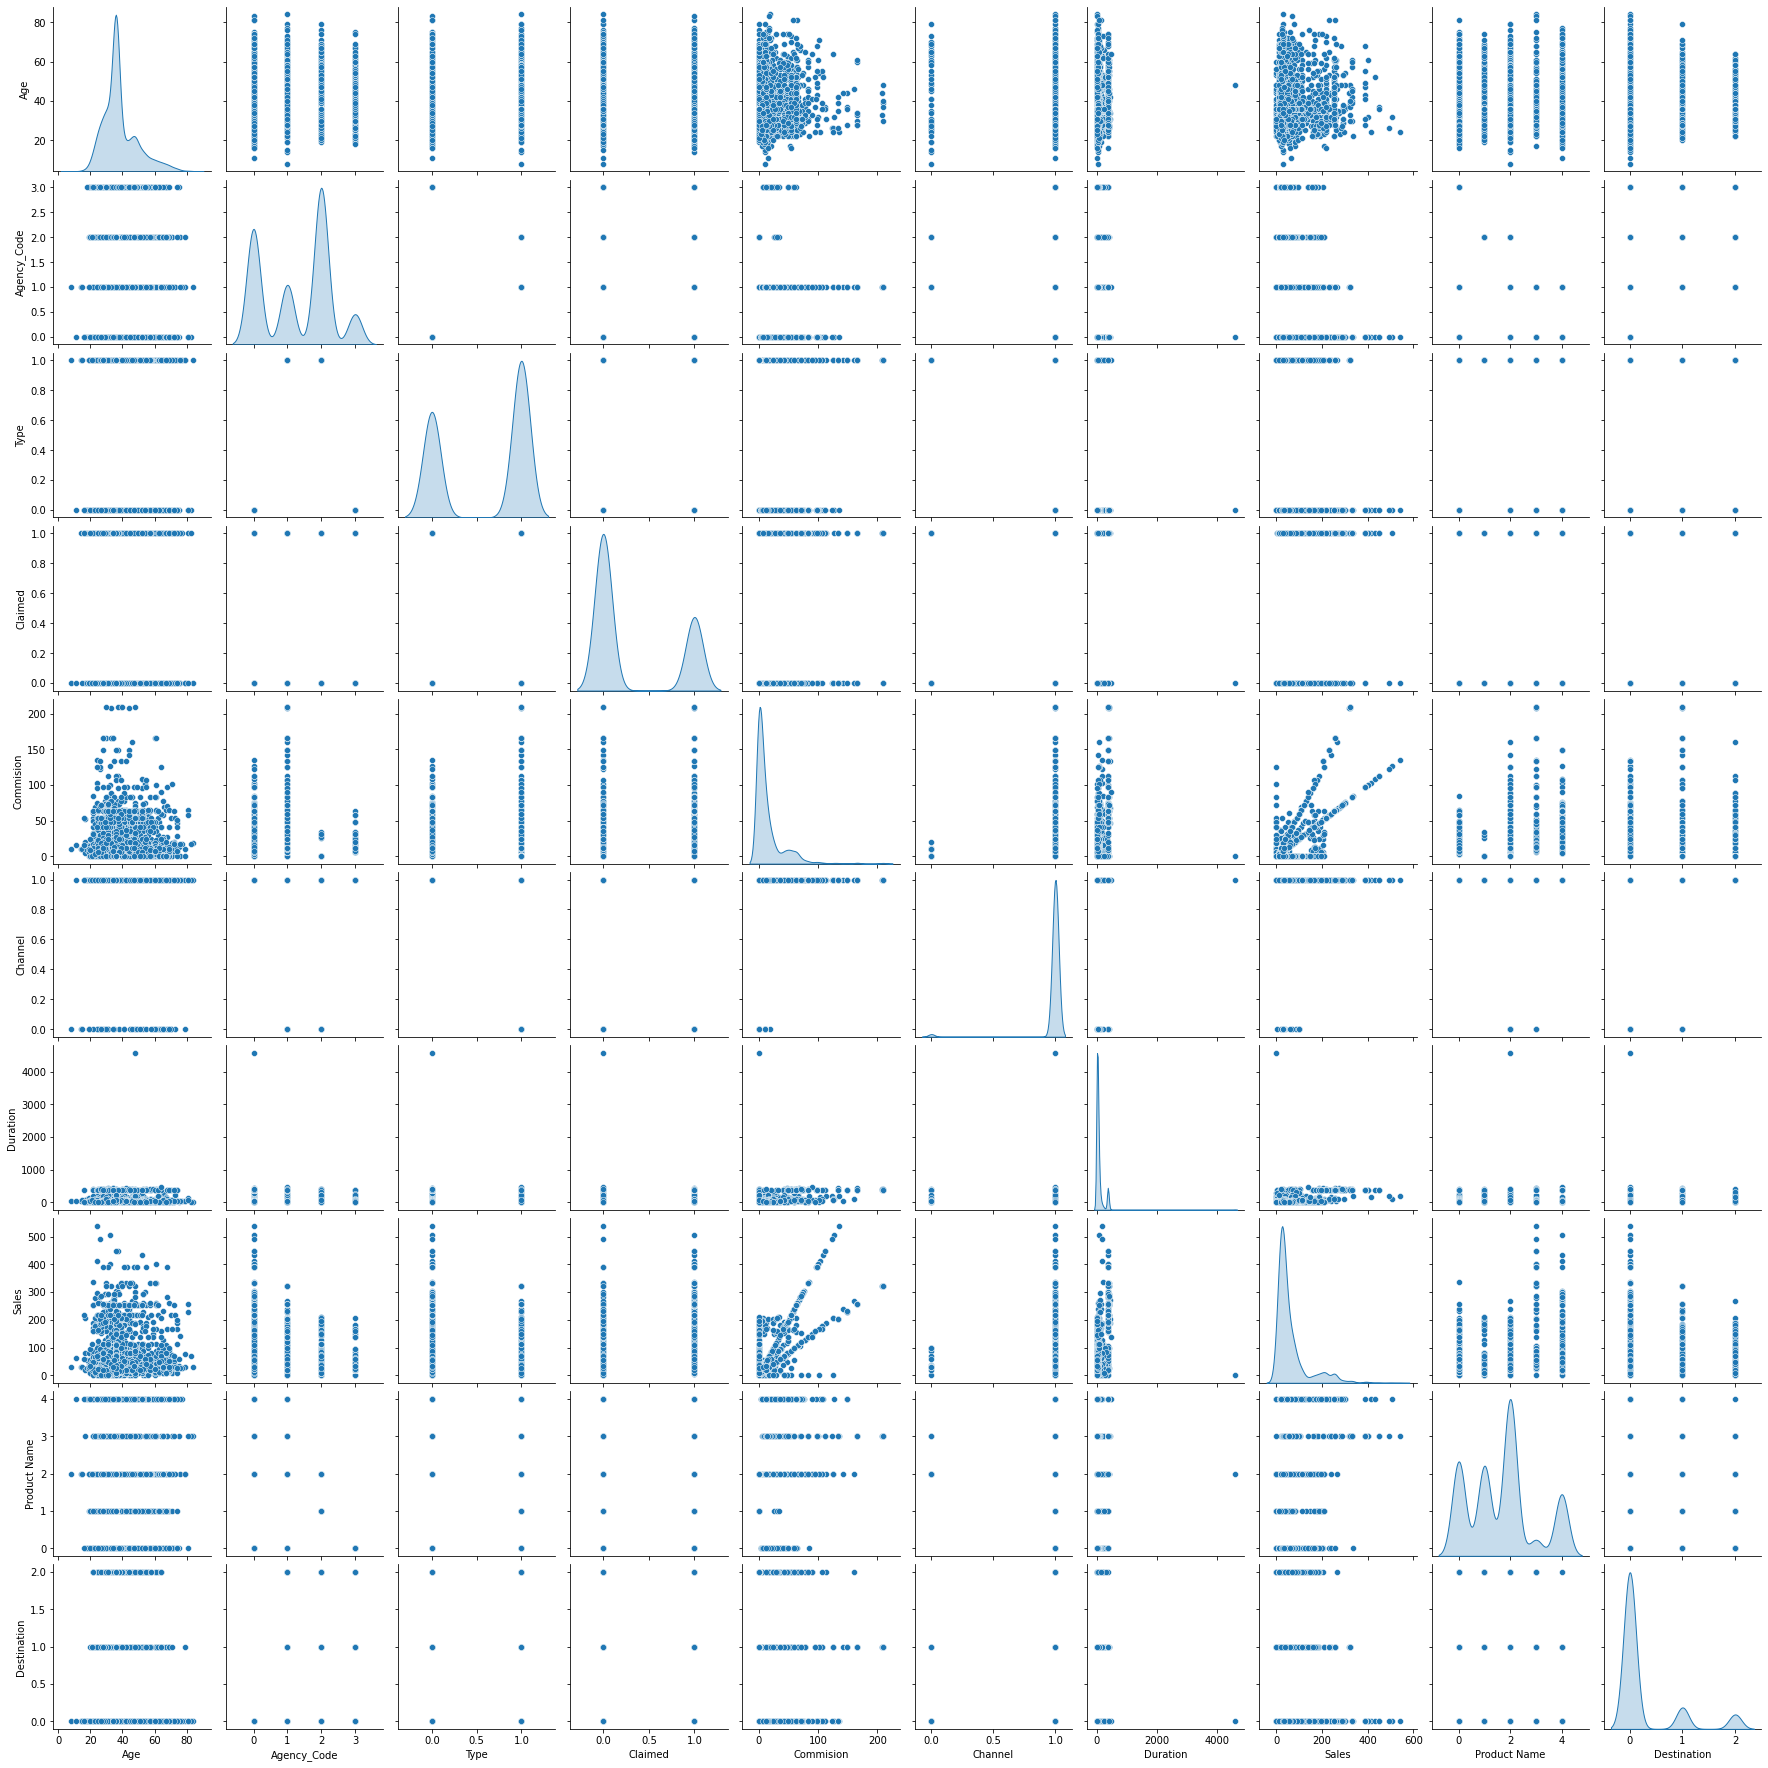

In [32]:
sns.pairplot(df,diag_kind='kde')


<AxesSubplot:>

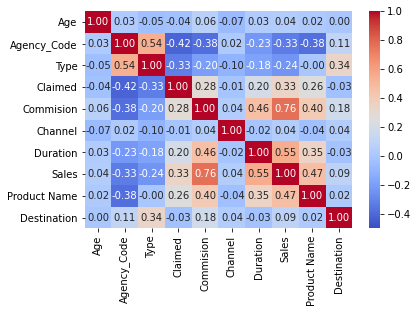

In [33]:
sns.heatmap(df.corr(),annot=True,fmt='.2f',vmin=-0.5,cmap='coolwarm')

# DECISON TREE

In [34]:
X=df.drop('Claimed',axis=1)

In [35]:
Y=df.pop('Claimed')

In [36]:
X_train,X_test,train_labels,test_labels=train_test_split(X,Y,test_size=0.30,random_state=1)

In [37]:
dtree=DecisionTreeClassifier(criterion='gini')

In [38]:
dtree.fit(X_train,train_labels)

DecisionTreeClassifier()

In [39]:
param_grid={
    'criterion':['gini'],
    'max_depth':[3,4,5],
    'min_samples_leaf':[5,10,15,20],
    'min_samples_split':[1,2,3,4,5]
}

In [40]:
dtree=DecisionTreeClassifier(random_state=1)

In [41]:
grid_search=GridSearchCV(estimator=dtree,param_grid=param_grid,cv=5)

In [42]:
grid_search.fit(X_train,train_labels)

C:\Users\Kinshuk\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Kinshuk\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Kinshuk\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\Kinshuk\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Kinshuk\AppData\Roaming\Python\Python38\sit

C:\Users\Kinshuk\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Kinshuk\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Kinshuk\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\Kinshuk\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Kinshuk\AppData\Roaming\Python\Python38\sit

C:\Users\Kinshuk\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Kinshuk\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Kinshuk\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\Kinshuk\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Kinshuk\AppData\Roaming\Python\Python38\sit

C:\Users\Kinshuk\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Kinshuk\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Kinshuk\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\Kinshuk\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Kinshuk\AppData\Roaming\Python\Python38\sit

C:\Users\Kinshuk\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Kinshuk\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Kinshuk\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\Kinshuk\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Kinshuk\AppData\Roaming\Python\Python38\sit

C:\Users\Kinshuk\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Kinshuk\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Kinshuk\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\Kinshuk\AppData\Roaming\Python\Python38\site-packages\sklearn\tree\_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Kinshuk\AppData\Roaming\Python\Python38\sit

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini'], 'max_depth': [3, 4, 5],
                         'min_samples_leaf': [5, 10, 15, 20],
                         'min_samples_split': [1, 2, 3, 4, 5]})

In [43]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 10,
 'min_samples_split': 2}

In [44]:
best_grid=grid_search.best_estimator_

In [45]:
train_predict = best_grid.predict(X_train)
test_predict = best_grid.predict(X_test)

C:\Users\Kinshuk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 720x720 with 0 Axes>

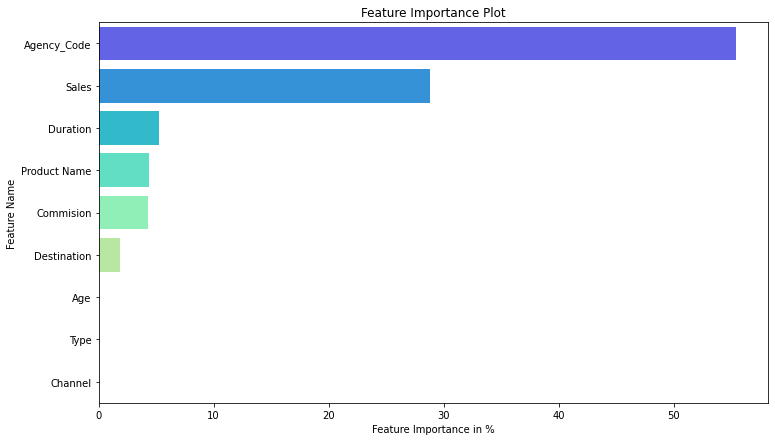

In [46]:
plt.figure(figsize=(10,10))
x=pd.DataFrame(best_grid.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()


# RANDOM FOREST

In [47]:
rf=RandomForestClassifier(n_estimators=501)

In [48]:
rf.fit(X_train,train_labels)

RandomForestClassifier(n_estimators=501)

In [49]:
param_grid=param_grid={
    'max_depth':[10,20],
    'max_features':[1,2,3,4,5],
    'min_samples_split':[2,3,4,5],
    'min_samples_leaf' :[10,25,50],
    'n_estimators':[5,10,15,20]
    
}

In [50]:
rf=RandomForestClassifier(random_state=1)

In [51]:
grid_search1=GridSearchCV(estimator=rf,param_grid=param_grid,cv=3)

In [52]:
grid_search1.fit(X_train,train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [10, 20], 'max_features': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [10, 25, 50],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [5, 10, 15, 20]})

In [53]:
grid_search1.best_params_

{'max_depth': 10,
 'max_features': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'n_estimators': 20}

In [54]:
best_grid1=grid_search1.best_estimator_

In [55]:
train1_predict=best_grid1.predict(X_train)
test1_predict=best_grid1.predict(X_test)

C:\Users\Kinshuk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 720x720 with 0 Axes>

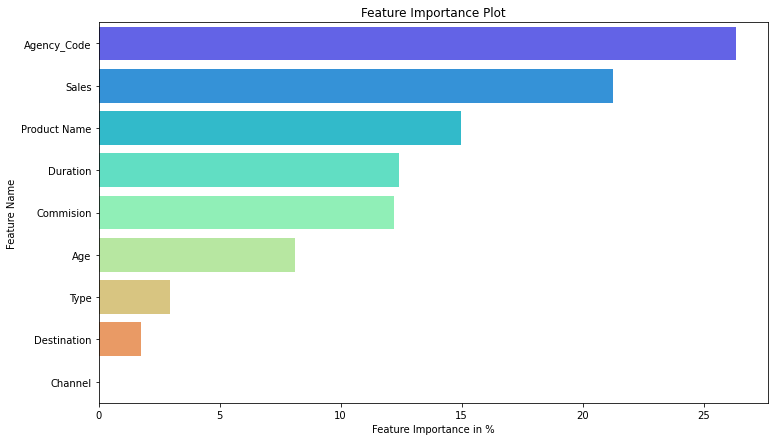

In [56]:
plt.figure(figsize=(10,10))
x=pd.DataFrame(best_grid1.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()


# ANN

In [57]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_trains = sc.fit_transform(X_train) 
X_tests = sc.transform (X_test)

In [58]:
param_grid = {
    'hidden_layer_sizes': [50,100,150],
    'solver': [ 'adam','sgd'],
    'activation':['logistic','relu'],
    'tol': [0.01],
    'max_iter' : [10,30,50]
}

ann = MLPClassifier(random_state=1)

grid_search2 = GridSearchCV(estimator = ann, param_grid = param_grid, cv = 3)

In [59]:
grid_search2.fit(X_train,train_labels)

C:\Users\Kinshuk\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Kinshuk\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Kinshuk\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Kinshuk\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.wa

C:\Users\Kinshuk\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Kinshuk\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Kinshuk\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Kinshuk\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.wa

GridSearchCV(cv=3, estimator=MLPClassifier(random_state=1),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [50, 100, 150],
                         'max_iter': [10, 30, 50], 'solver': ['adam', 'sgd'],
                         'tol': [0.01]})

In [60]:
grid_search2.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 150,
 'max_iter': 50,
 'solver': 'adam',
 'tol': 0.01}

In [61]:
best_grid2=grid_search2.best_estimator_

In [62]:
train2_predict=best_grid2.predict(X_train)
test2_predict=best_grid2.predict(X_test)

# PERFORMANCE METRICS

# CART

In [63]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix,classification_report

In [65]:
acc1=round(accuracy_score(train_predict,train_labels)*100,2)
acc1

78.12

In [66]:
 print(classification_report(train_predict,train_labels))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1463
           1       0.58      0.69      0.63       539

    accuracy                           0.78      2002
   macro avg       0.73      0.75      0.74      2002
weighted avg       0.80      0.78      0.79      2002



In [67]:
acc2=accuracy_score(test_predict,test_labels)*100
acc2

78.23050058207218

In [68]:
print(classification_report(test_predict,test_labels))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       629
           1       0.58      0.68      0.63       230

    accuracy                           0.78       859
   macro avg       0.73      0.75      0.74       859
weighted avg       0.80      0.78      0.79       859



<AxesSubplot:>

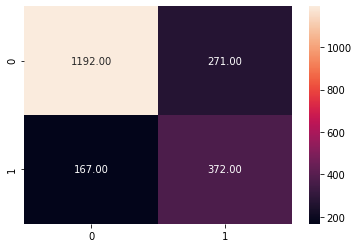

In [69]:
z=confusion_matrix(train_predict,train_labels)
sns.heatmap(z,annot=True,fmt='1.2f')


<AxesSubplot:>

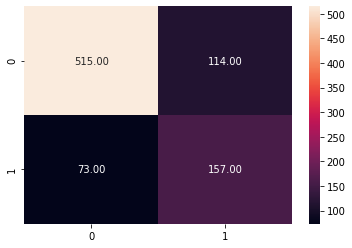

In [70]:
z1=confusion_matrix(test_predict,test_labels)
sns.heatmap(z1,annot=True,fmt='1.2f')

In [71]:
probs=best_grid.predict_proba(X_test)
probs=probs[:,1]
auc1=roc_auc_score(test_labels,probs)
print(round(auc1,2))
#fpr,tpr,threshold=roc_curve(test_)


0.81


In [72]:
probs1=best_grid.predict_proba(X_train)
probs1=probs1[:,1]
auc2=roc_auc_score(train_labels,probs1)
print(round(auc2,2))

0.82


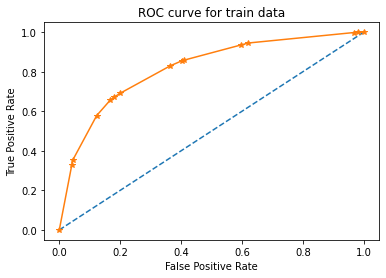

In [73]:
cart_fpr,cart_tpr,cart_threshold=roc_curve(train_labels,probs1)
plt.title('ROC curve for train data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot((0,1),(0,1),linestyle='--')
plt.plot(cart_fpr,cart_tpr,marker='*')
plt.show()

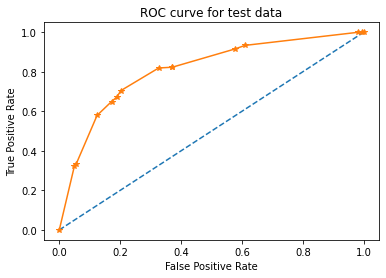

In [74]:
cart1_fpr,cart1_tpr,cart1_threshold=roc_curve(test_labels,probs)
plt.title('ROC curve for test data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.plot((0,1),(0,1),linestyle='--')
plt.plot(cart1_fpr,cart1_tpr,marker='*')
plt.show()

# RANDOM FOREST

In [75]:
acc3=round(accuracy_score(train1_predict,train_labels)*100,2)
acc3

80.97

In [76]:
acc4=round(accuracy_score(test1_predict,test_labels)*100,2)
acc4

77.76

In [77]:
print(classification_report(test1_predict,test_labels))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84       639
           1       0.55      0.68      0.61       220

    accuracy                           0.78       859
   macro avg       0.72      0.75      0.73       859
weighted avg       0.80      0.78      0.78       859



In [78]:
probs2=best_grid1.predict_proba(X_train)
probs2=probs2[:,1]
auc1=roc_auc_score(train_labels,probs2)
print(round(auc1,2))

0.88


In [79]:
probs3=best_grid1.predict_proba(X_test)
probs3=probs3[:,1]
auc1=roc_auc_score(test_labels,probs3)
print(round(auc1,2))

0.81


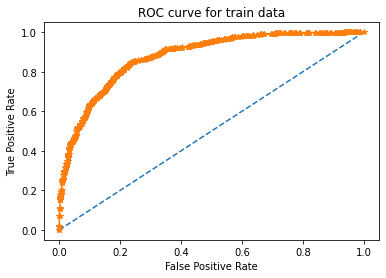

In [80]:
rf_fpr,rf_tpr,rf_threshold=roc_curve(train_labels,probs2)
plt.title('ROC curve for train data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot((0,1),(0,1),linestyle='--')
plt.plot(rf_fpr,rf_tpr,marker='*')
plt.show()

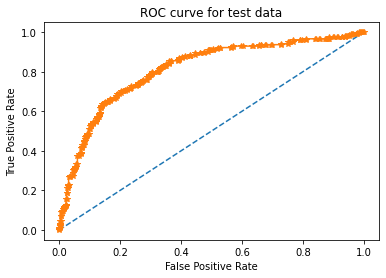

In [81]:
rf1_fpr,rf1_tpr,rf1_threshold=roc_curve(test_labels,probs3)
plt.title('ROC curve for test data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot((0,1),(0,1),linestyle='--')
plt.plot(rf1_fpr,rf1_tpr,marker='*')
plt.show()

<AxesSubplot:>

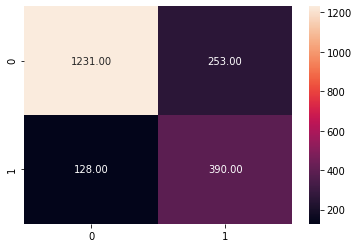

In [82]:
z2=confusion_matrix(train1_predict,train_labels)
sns.heatmap(z2,annot=True,fmt='.2f')


<AxesSubplot:>

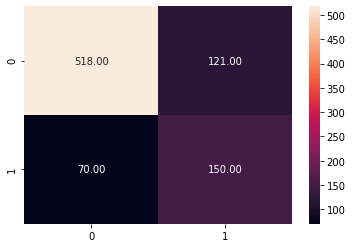

In [83]:
z3=confusion_matrix(test1_predict,test_labels)
sns.heatmap(z3,annot=True,fmt='.2f')

# ANN

In [84]:
acc5=round(accuracy_score(train2_predict,train_labels)*100,2)
acc5

76.97

In [85]:
acc6=round(accuracy_score(test2_predict,test_labels)*100,2)
acc6

76.48

In [86]:
print(classification_report(train2_predict,train_labels))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1500
           1       0.53      0.68      0.60       502

    accuracy                           0.77      2002
   macro avg       0.71      0.74      0.72      2002
weighted avg       0.79      0.77      0.78      2002



In [87]:
print(classification_report(test2_predict,test_labels))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84       656
           1       0.50      0.67      0.57       203

    accuracy                           0.76       859
   macro avg       0.69      0.73      0.71       859
weighted avg       0.80      0.76      0.78       859



In [88]:
probs4=best_grid2.predict_proba(X_train)
probs4=probs4[:,1]
auc4=roc_auc_score(train_labels,probs4)
print(round(auc1,2))

0.81


In [89]:
probs5=best_grid2.predict_proba(X_test)
probs5=probs5[:,1]
auc5=roc_auc_score(test_labels,probs5)
print(round(auc5,2))

0.79


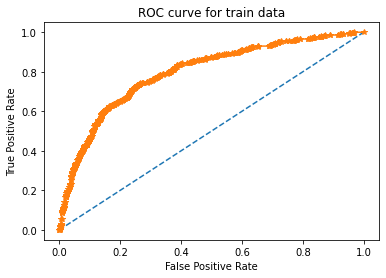

In [90]:
ann_fpr,ann_tpr,ann_threshold=roc_curve(train_labels,probs4)
plt.title('ROC curve for train data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.plot((0,1),(0,1),linestyle='--')
plt.plot(ann_fpr,ann_tpr,marker='*')
plt.show()

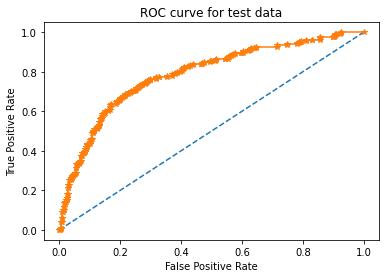

In [91]:
ann1_fpr,ann1_tpr,ann1_threshold=roc_curve(test_labels,probs5)
plt.title('ROC curve for test data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot((0,1),(0,1),linestyle='--')
plt.plot(ann1_fpr,ann1_tpr,marker='*')
plt.show()

<AxesSubplot:>

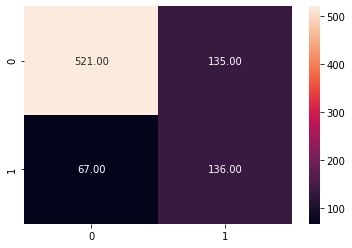

In [92]:
z3=confusion_matrix(test2_predict,test_labels)
sns.heatmap(z3,annot=True,fmt='.2f')

<AxesSubplot:>

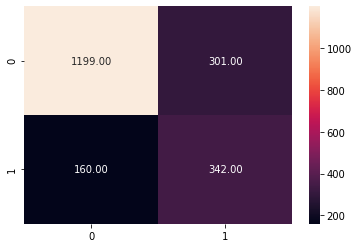

In [93]:
z4=confusion_matrix(train2_predict,train_labels)
sns.heatmap(z4,annot=True,fmt='.2f')

In [94]:
ctrain_acc=78.12
ctrain_auc=0.88
ctrain_recall=0.69
ctrain_precision=0.58
ctrain_f1=0.63
ctest_acc=78.23
ctest_auc=0.81
ctest_recall=0.68
ctest_precision=0.58
ctest_f1=0.63

rf_train_acc=80.97
rf_train_auc=0.88
rf_train_recall=0.75
rf_train_precision=0.61
rf_train_f1=0.67
rf_test_acc=77.76
rf_test_auc=0.81
rf_test_recall=0.68
rf_test_precision=0.55
rf_test_f1=0.61

ann_train_acc=76.97
ann_train_auc=0.81
ann_train_recall=0.68
ann_train_precision=0.53
ann_train_f1=0.60
ann_test_acc=76.48
ann_test_auc=0.79
ann_test_recall=0.67
ann_test_precision=0.50
ann_test_f1=0.57




In [95]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
df_comp = pd.DataFrame({'CART Train':[ctrain_acc,ctrain_auc,ctrain_recall,ctrain_precision,ctrain_f1],
        'CART Test':[ctest_acc,ctest_auc,ctest_recall,ctest_precision,ctest_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[ann_train_acc,ann_train_auc,ann_train_recall,ann_train_precision,ann_train_f1],
        'Neural Network Test':[ann_test_acc,ann_test_auc,ann_test_recall,ann_test_precision,ann_test_f1]},index=index)
df_comp

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,78.12,78.23,80.97,77.76,76.97,76.48
AUC,0.88,0.81,0.88,0.81,0.81,0.79
Recall,0.69,0.68,0.75,0.68,0.68,0.67
Precision,0.58,0.58,0.61,0.55,0.53,0.50
F1 Score,0.63,0.63,0.67,0.61,0.60,0.57


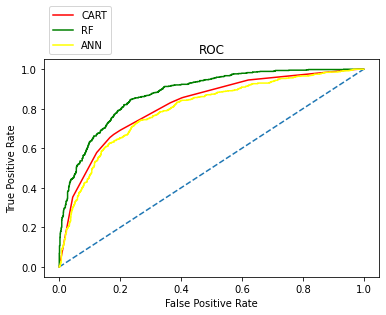

In [96]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_fpr,cart_tpr, color='red', label="CART")
plt.plot(rf_fpr, rf_tpr, color='green', label="RF")
plt.plot(ann_fpr, ann_tpr, color='yellow', label="ANN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.0, 1., .10), loc='lower left')

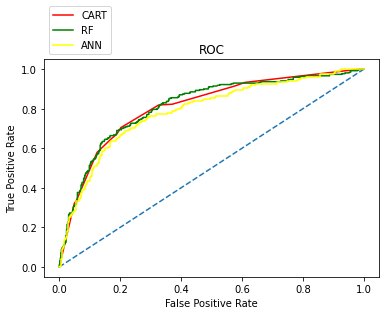

In [97]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart1_fpr,cart1_tpr, color='red', label="CART")
plt.plot(rf1_fpr, rf1_tpr, color='green', label="RF")
plt.plot(ann1_fpr, ann1_tpr, color='yellow', label="ANN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.0, 1., .10), loc='lower left')